## 练习

1. 找到另一张图像，然后尝试标记包含该对象的边界框。比较标注边界框和标注类别哪个需要更长的时间？
1. 为什么`box_corner_to_center`和`box_center_to_corner`的输入参数的最内层维度总是4？


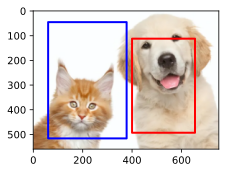

In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import torch
from d2l import torch as d2l

d2l.set_figsize()
img = d2l.plt.imread('C:/Users/14591/newfish/【动手学习深度学习】/13. 计算机视觉/catdog2.jpg')
d2l.plt.imshow(img);

#@save
def box_corner_to_center(boxes):
    """从（左上，右下）转换到（中间，宽度，高度）"""
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    cx = (x1 + x2) / 2
    cy = (y1 + y2) / 2
    w = x2 - x1
    h = y2 - y1
    boxes = torch.stack((cx, cy, w, h), axis=-1)
    return boxes

#@save
def box_center_to_corner(boxes):
    """从（中间，宽度，高度）转换到（左上，右下）"""
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - 0.5 * w
    y1 = cy - 0.5 * h
    x2 = cx + 0.5 * w
    y2 = cy + 0.5 * h
    boxes = torch.stack((x1, y1, x2, y2), axis=-1)
    return boxes

# bbox是边界框的英文缩写
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 493.0]

boxes = torch.tensor((dog_bbox, cat_bbox))
box_center_to_corner(box_corner_to_center(boxes)) == boxes

#@save
def bbox_to_rect(bbox, color):
    # 将边界框(左上x,左上y,右下x,右下y)格式转换成matplotlib格式：
    # ((左上x,左上y),宽,高)
    return d2l.plt.Rectangle(
        xy=(bbox[0], bbox[1]), width=bbox[2]-bbox[0], height=bbox[3]-bbox[1],
        fill=False, edgecolor=color, linewidth=2)

fig = d2l.plt.imshow(img)
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'));

## 练习2
在目标检测中，`box_corner_to_center` 和 `box_center_to_corner` 函数用于在两种不同的边界框表示之间进行转换。这两种表示分别是：

1. **边角表示（Corner Representation）**：一个边界框通过左上角和右下角的两个点来表示，通常为 (xmin, ymin, xmax, ymax)。
2. **中心表示（Center Representation）**：一个边界框通过中心点和框的宽度及高度来表示，通常为 (x_center, y_center, width, height)。

对于这两种表示，我们通常使用一个包含四个元素的向量来表示一个边界框。这就是为什么 `box_corner_to_center` 和 `box_center_to_corner` 的输入参数的最内层维度总是4的原因。这四个数值提供了足够的信息来唯一确定一个矩形边界框在图像中的位置和大小。

- 在**边角表示**中，我们需要两个点（左上角和右下角）的坐标，每个点需要横纵两个坐标值，总共4个值。
- 在**中心表示**中，我们需要中心点的坐标和边界框的宽度及高度，同样是4个值。

这些函数在目标检测任务中是非常标准的，因为无论是训练还是推理，经常需要在这两种边界框表示之间进行转换。例如，训练数据可能以一种格式提供边界框信息，而模型输出可能是另一种格式。这时就需要用到这样的转换函数。